### 1) Problem statement
- This project understands how the loan default is affected by other variables such as Age, Income, Home Ownership, Loan Intent, Loan Gread, Loan Ammonunt, Loan Intrest Rate, Loan Status, Debt To Income Ratio, Historical Loan Defult, and Person's Credit History Length

### 2.1 Import Data and Required Packages


In [1]:
# Data Loading and Exploring
import pandas as pd
import numpy as np

# Visulization
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
filepath = 'D:/pproject/ml_project/notebook/credit_risk_dataset.csv'
df = pd.read_csv(filepath)

In [6]:
# checking the data size
df.shape

(32581, 12)

In [7]:
# checking columns name
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [8]:
# finding datatypes for every column
df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [9]:
# finding unique value for categorical columns
print('person_home_ownership: ',df['person_home_ownership'].unique())
print('loan_intent: ',df['loan_intent'].unique())
print('loan_grade: ',df['loan_grade'].unique())
print('cb_person_default_on_file: ',df['cb_person_default_on_file'].unique())

person_home_ownership:  ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan_intent:  ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan_grade:  ['D' 'B' 'C' 'A' 'E' 'F' 'G']
cb_person_default_on_file:  ['Y' 'N']


In [10]:
# checking the statstics 
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9.589371e+05,11.009286,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6.322087e+05,3.219474,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,5.000000e+04,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5.000000e+05,7.880000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8.000000e+05,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,1.220000e+06,13.460000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,3.500000e+06,23.220000,1.000000,0.830000,30.000000


In [11]:
# counting the null values
df.isnull().sum()

person_age                      0
person_income                   0
person_home_ownership           0
person_emp_length             895
loan_intent                     0
loan_grade                      0
loan_amnt                       0
loan_int_rate                   0
loan_status                     0
loan_percent_income             0
cb_person_default_on_file       0
cb_person_cred_hist_length      0
dtype: int64

In [12]:
# dropping the missing values
df.dropna(inplace=True)
df.head(3)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,3500000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,100000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,550000,12.87,1,0.57,N,3


### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

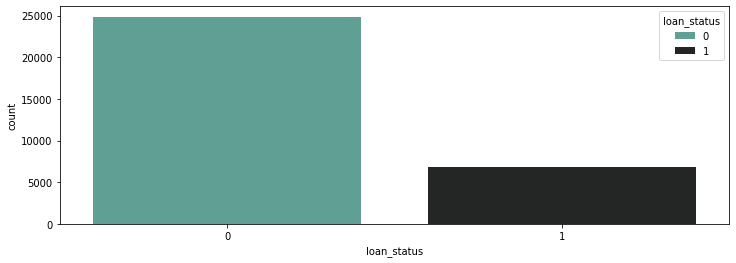

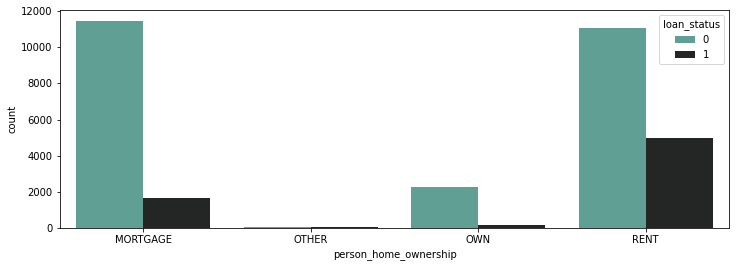

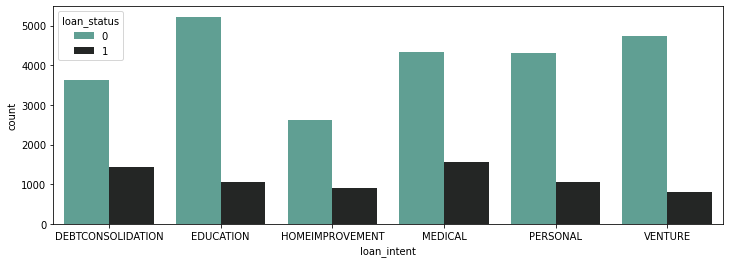

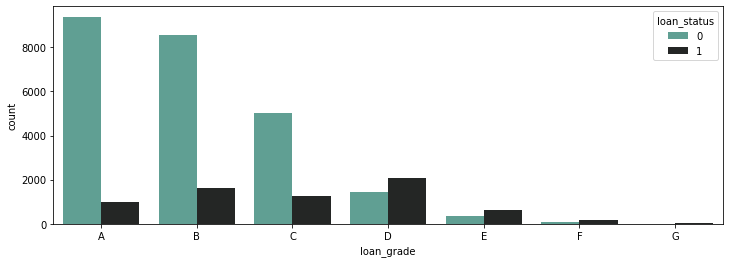

In [13]:
# ploting histplot to check data distrubution
columns = ['loan_status','person_home_ownership','loan_intent','loan_grade']

# for loop to itrate over columns list
for i in columns:
    plt.figure(figsize=(12,4))
    grade_order = sorted(df[i].unique())
    sns.countplot(x=i,order = grade_order,palette='dark:#5A9_r', data=df,hue='loan_status')

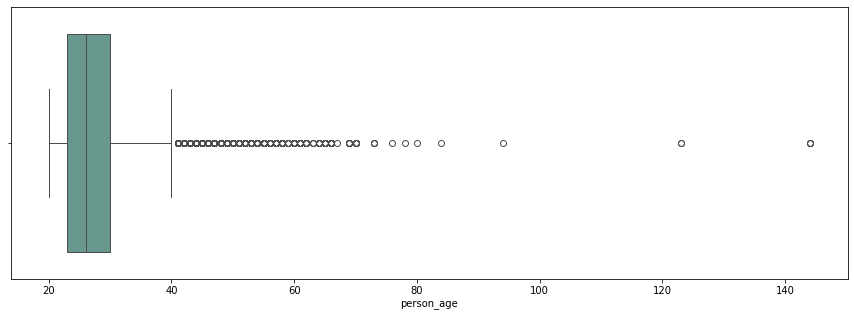

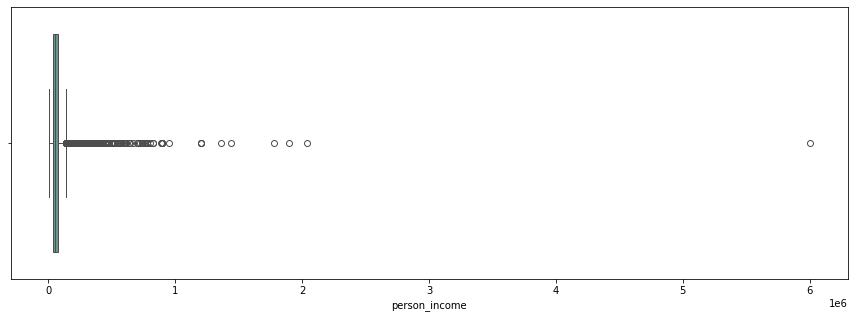

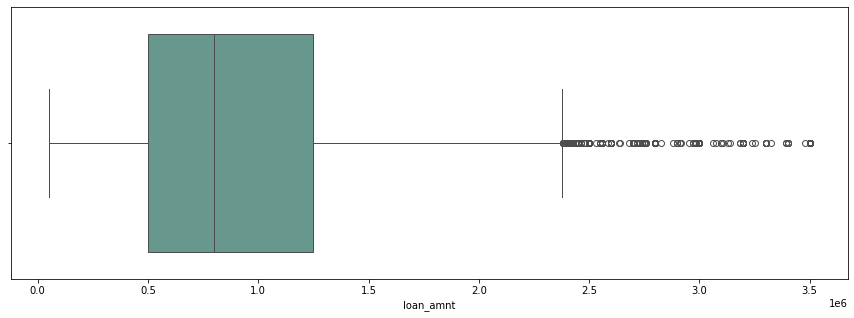

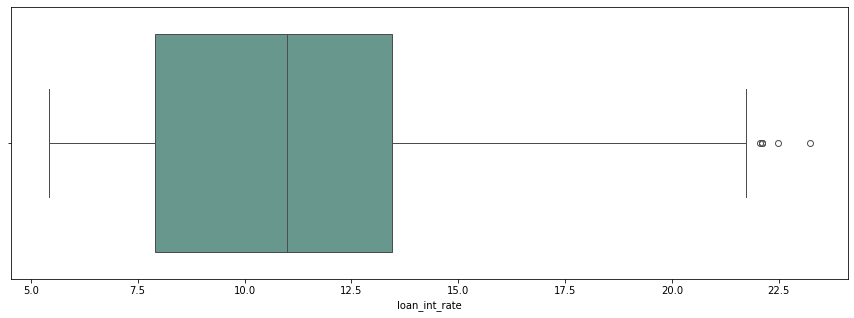

In [14]:
# ploting boxplot to chek outliers 
columns = ['person_age','person_income','loan_amnt','loan_int_rate']

# for loop to itrate over columns list
for i in columns:
    plt.figure(figsize=(15,5))
    sns.boxplot(x=df[i],color='#609f93')
    plt.show()

In [15]:
# selecting data with person_age is < 90
df = df[(df['person_age']<= 90)]

In [16]:
df['loan_percent_income'] = df['loan_amnt']/df['person_income']

In [18]:
df.to_csv('D:/pproject/ml_project/notebook/final_data.csv')

In our case we have age grater then 90 (ie. 140) so we discard the data which has more then person_age > 90

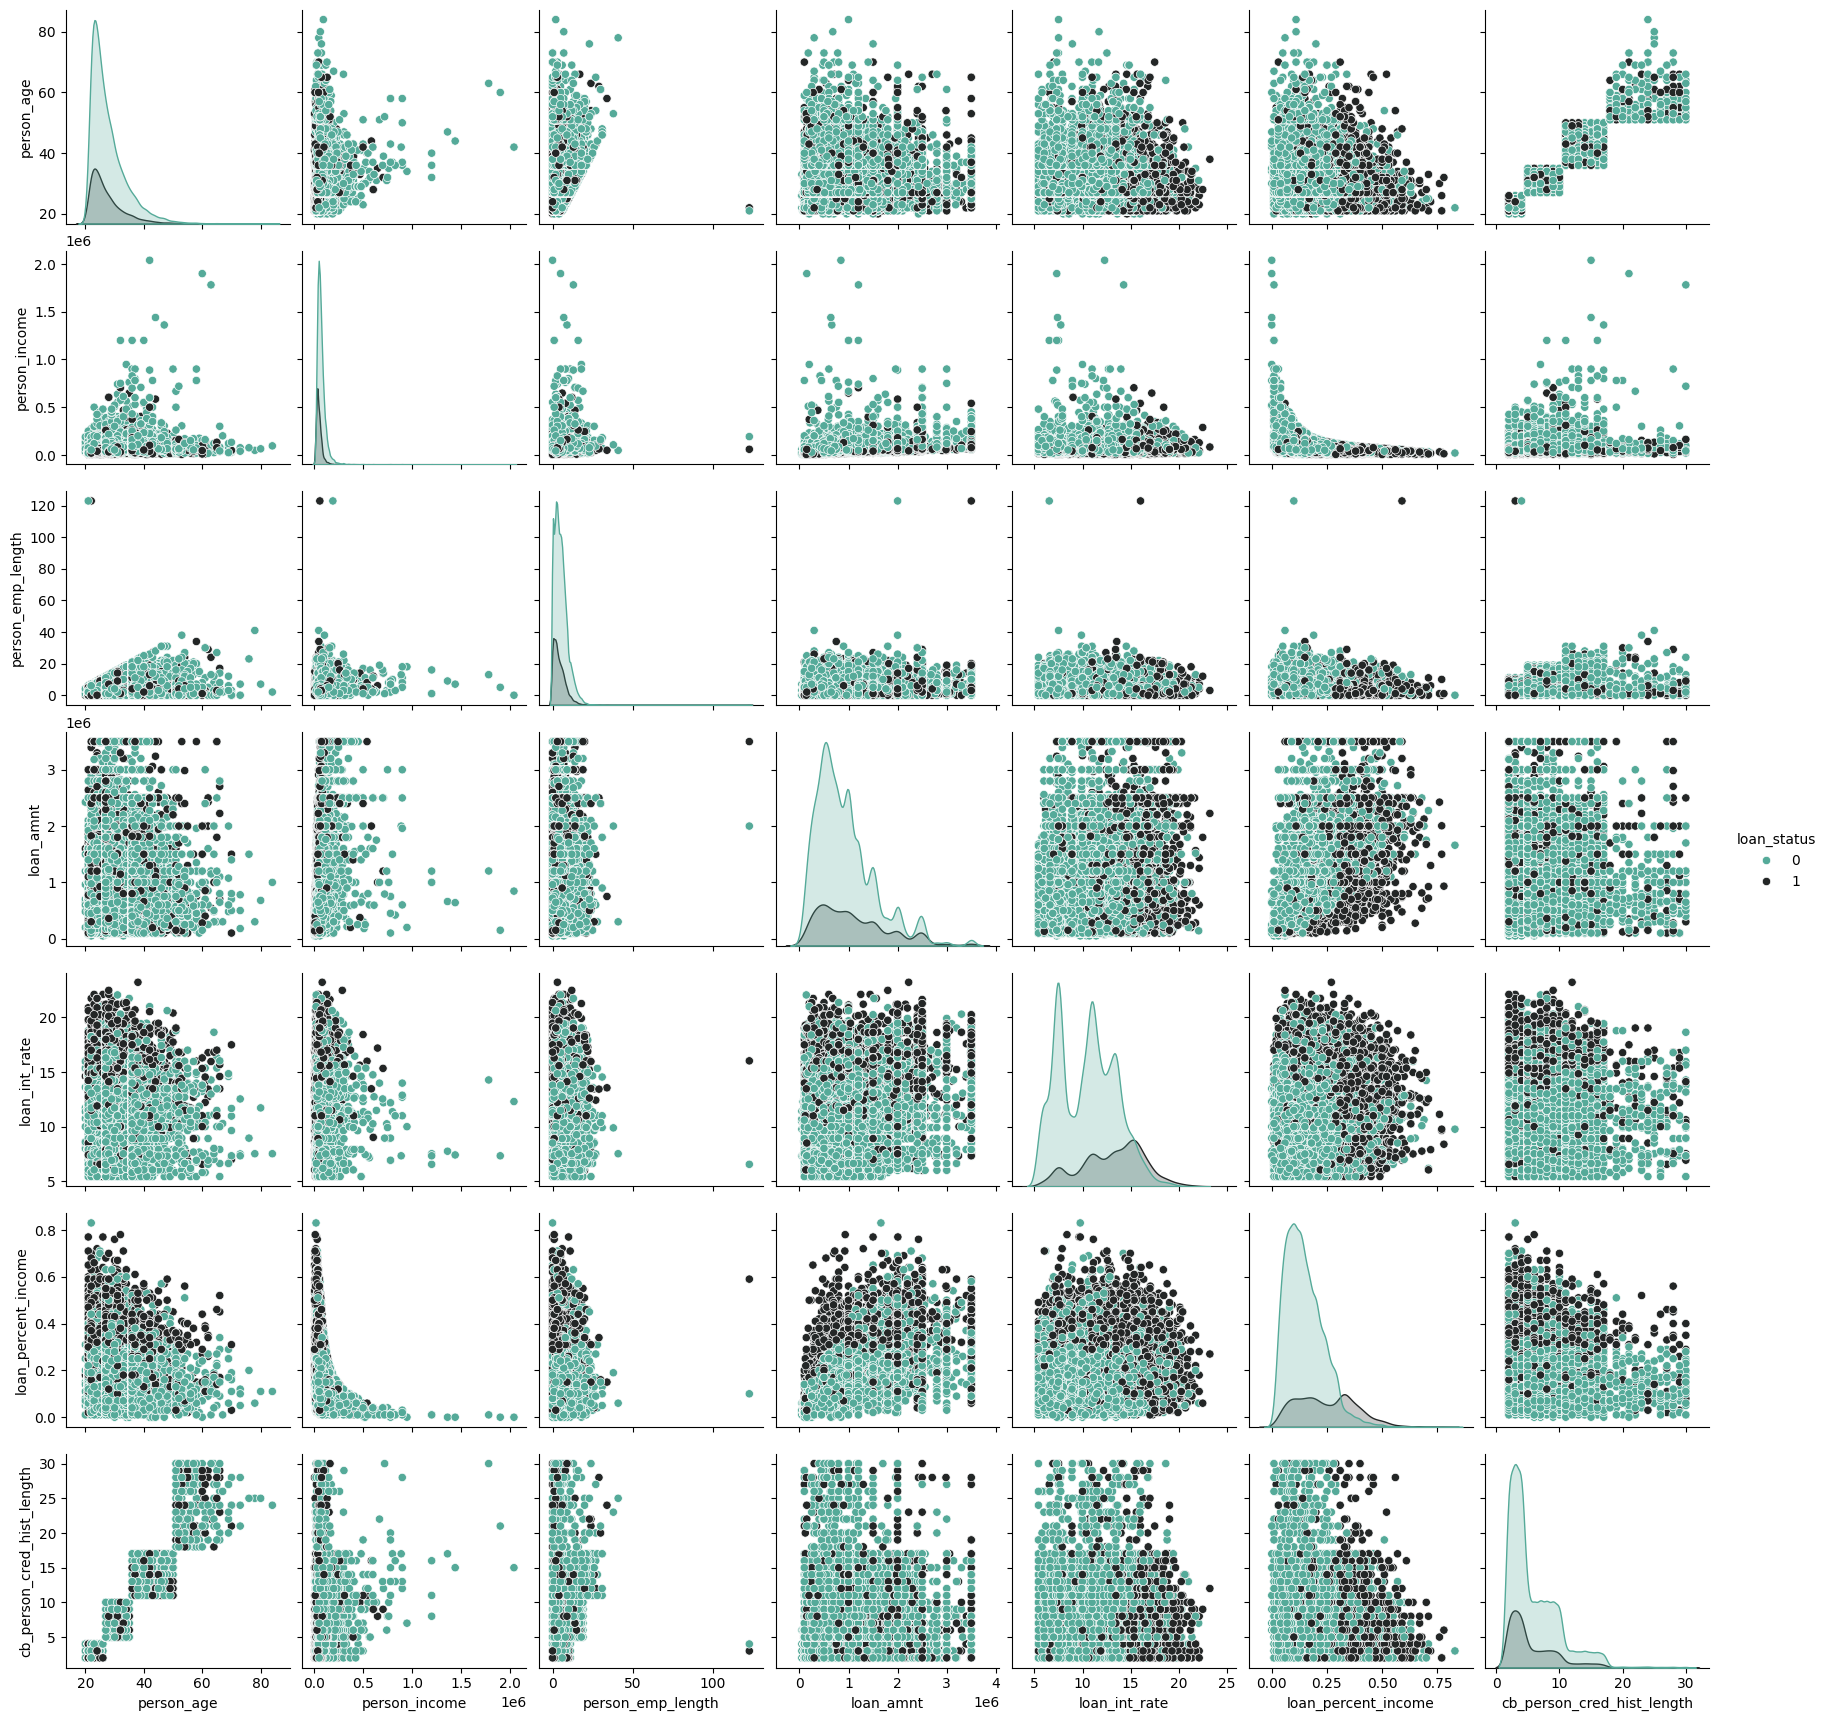

In [49]:
sns.pairplot(df, hue='loan_status',palette='dark:#5A9_r')